<a href="https://colab.research.google.com/github/Shlok-Agarwal-7/Image-Denoising/blob/main/image_denoising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random

In [ ]:
def add_gaussian_noise(image, mean=0, var=0.01):
    # Convert image to float and normalize to [0, 1]
    image = image.astype(np.float32) / 255.0

    # Generate Gaussian noise
    sigma = var ** 0.5
    noise = np.random.normal(mean, sigma, image.shape)  # Shape will match the (height, width, 3)

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the values to be in the valid range [0, 1] and convert back to [0, 255]
    noisy_image = np.clip(noisy_image, 0, 1)
    noisy_image = (noisy_image * 255).astype(np.uint8)

    return noisy_image

In [ ]:
def add_random_gaussian_noise(image, mean=0, min_var=0.1, max_var=0.2):
    # Randomly select variance between min_var and max_var
    var = random.uniform(min_var, max_var)

    # Generate Gaussian noise with the selected variance
    sigma = var ** 0.5
    noise = np.random.normal(mean, sigma, image.shape)

    # Normalize the image to [0, 1] range
    image = image.astype(np.float32) / 255.0

    # Add noise to the image
    noisy_image = image + noise

    # Clip values to ensure they're in the [0, 1] range
    noisy_image = np.clip(noisy_image, 0, 1)

    # Convert back to [0, 255] and to uint8
    noisy_image = (noisy_image * 255).astype(np.uint8)

    return noisy_image

In [ ]:
image=cv2.imread('/content/drive/MyDrive/ISBI2016_ISIC_Part2B_Training_Data/ISBI2016_ISIC_Part2B_Training_Data/ISIC_0000000.jpg')

In [ ]:
image.shape

(767, 1022, 3)

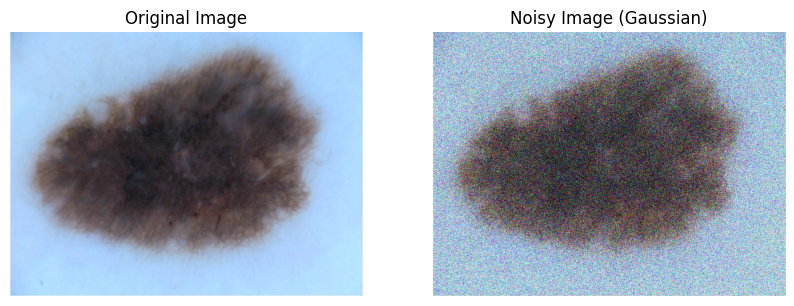

In [ ]:
noisy_image = add_random_gaussian_noise(image)

# Display original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noisy Image (Gaussian)")
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [ ]:
input_folder = '/content/drive/MyDrive/ISBI2016_ISIC_Part2B_Training_Data/ISBI2016_ISIC_Part2B_Training_Data'
noise_folder = '/content/drive/MyDrive/noisy_images'

if not os.path.exists(noise_folder):
    os.makedirs(noise_folder)

In [ ]:
for filename in os.listdir(input_folder):
  image_path = os.path.join(input_folder, filename)
  original_image = cv2.imread(image_path)
  noisy_image = add_random_gaussian_noise(original_image)
  noisy_path = os.path.join(noise_folder, filename)
  cv2.imwrite(noisy_path, noisy_image)